In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

df = pd.read_csv("ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
for column in df.columns:
    distinct_val = len(df[column].unique())
    print(f"{column}: {distinct_val} distinct values")

work_year: 4 distinct values
experience_level: 4 distinct values
employment_type: 4 distinct values
job_title: 93 distinct values
salary: 815 distinct values
salary_currency: 20 distinct values
salary_in_usd: 1035 distinct values
employee_residence: 78 distinct values
remote_ratio: 3 distinct values
company_location: 72 distinct values
company_size: 3 distinct values


In [5]:
# Replacing experience level with different values for readability
df['experience_level'] = df['experience_level'].replace({
    'SE' : 'Senior',
    'EX': 'Executive Level',
    'MI': 'Intermediate Level', 
    'EN' : 'Entry Level'
})

In [6]:
# Replacing employment type with different values for readability
df['employment_type'] = df['employment_type'].replace({
    'FT' : 'Full Time',
    'PT' : 'Part Time',
    'CT' : 'Contract',
    'FL' : 'Freelance'
})

In [7]:
df['remote_ratio'] = df['remote_ratio'].astype(str)

In [8]:
# Converting remote/hybrid/on-site values to strings
df['remote_ratio'] = df['remote_ratio'].replace({
    '0' : 'On-Site',
    '50': 'Hybrid',
    '100': 'Remote'
})

In [9]:
def job_category(job_title):
    data_analyst = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer", "Data Analytics Manager"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer", "Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer", "Head of Machine Learning"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect", "Manager Data Management"]

    if job_title in data_analyst:
        return "Data Analyst"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    else:
        return "Other"

In [10]:
df['job_category'] = df['job_title'].apply(job_category)

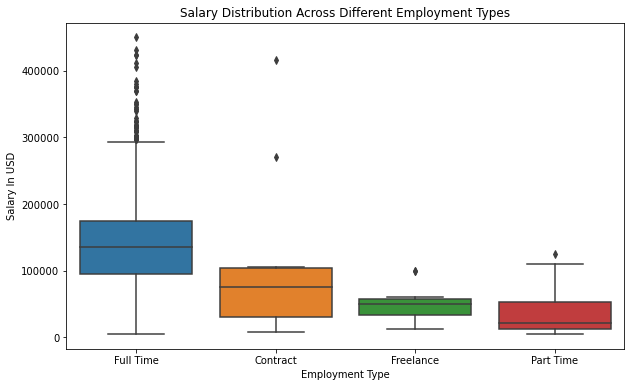

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Salary In USD')
plt.show()

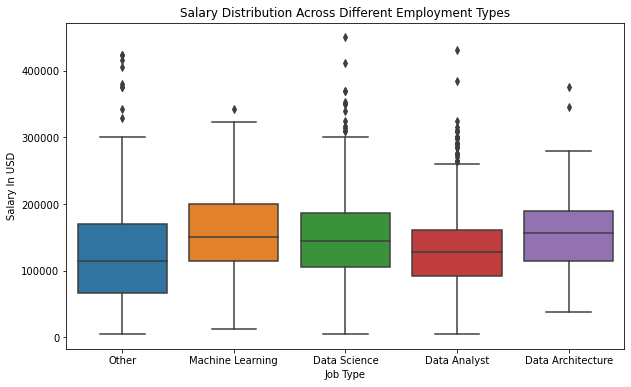

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Job Type')
plt.ylabel('Salary In USD')
plt.show()

In [13]:
# Adding managerial roles to job categories
def job_category(job_title):
    data_analyst = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Manager Data Management", "Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Data Analytics Manager"]

    if job_title in data_analyst:
        return "Data Analyst"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

In [14]:
df['job_category'] = df['job_title'].apply(job_category)

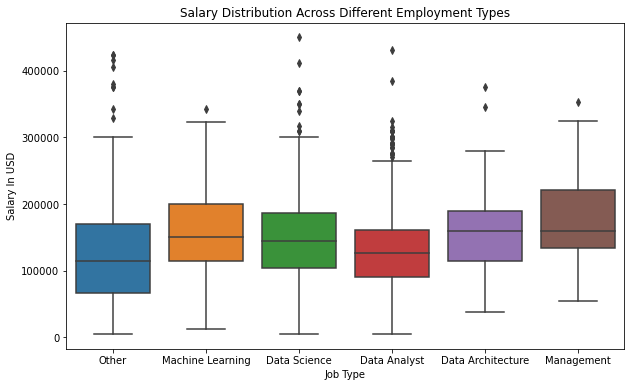

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='job_category', y='salary_in_usd')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Job Type')
plt.ylabel('Salary In USD')
plt.show()

In [16]:
# Adjusting salary for inflation via macrotrends.net
us_infltn = {2019: 0.0181, 2020: 0.0123, 2021: 0.0470, 2022: 0.065}
global_infltn = {2019: 0.0219, 2020: 0.0192, 2021: 0.0350, 2022: 0.088}

def newsalary(row):
    year = row['work_year']
    salary_in_usd = row['salary_in_usd']
    currency = row['salary_currency']

    if year == 2023:
        return salary_in_usd

    adjusted_salary = salary_in_usd
    for y in range(year, 2023):
        if currency == 'USD':
            inflation_rate = us_infltn[y]
        else:
            inflation_rate = global_infltn[y]

        adjusted_salary *= (1 + inflation_rate)

    return adjusted_salary
df['adjusted_salary'] = df.apply(newsalary, axis=1)

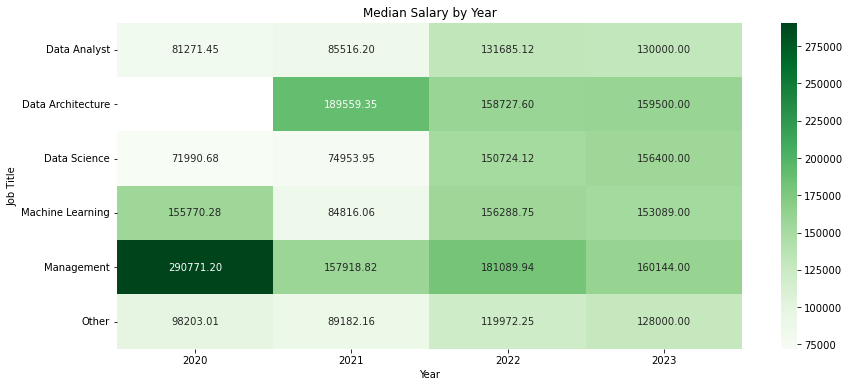

In [17]:
pivot_table = df.pivot_table(values='adjusted_salary', index='job_category', columns='work_year', aggfunc='median')
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="Greens", cbar = True)
plt.title('Median Salary by Year')
plt.xlabel('Year')
plt.ylabel('Job Title')
plt.show()

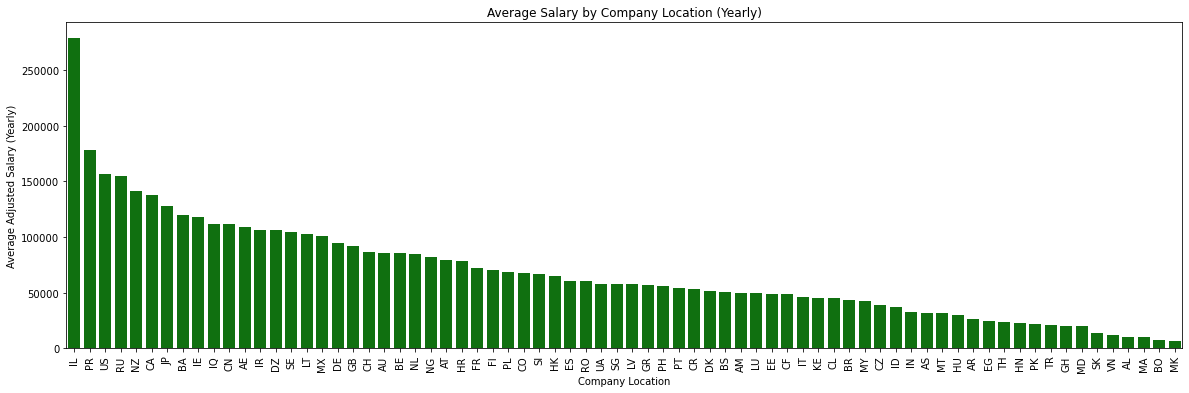

In [18]:
avg_sal_loc = df.groupby('company_location')['adjusted_salary'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
sns.barplot(x=avg_sal_loc.index, y=avg_sal_loc, color='Green')
plt.title('Average Salary by Company Location (Yearly)')
plt.xlabel('Company Location')
plt.ylabel('Average Adjusted Salary (Yearly)')
plt.xticks(rotation=90)
plt.show()